In [19]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


# Baseline model requirement

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Other Modeling techniques

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report



In [20]:
# Provide the file path
file_path = r'C:\Users\chimi\Desktop\Python Data Science Projects\space_debris_classifications\space_debris_classifications\data\pre-processed datas-final\spacefinal_cleaned.csv'

# Read the CSV file
space_df = pd.read_csv(file_path)




In [21]:
space_df.head(5)

,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,AP_DIFF,SEMIMINOR_AXIS,ORBITAL_VELOCITY,TARGET,RCS_SIZE_MEDIUM,RCS_SIZE_SMALL
0,2.921700,0.652893,7.7156,90.2410,243.1216,38.7796,23588,0.024341,8.830000e-06,0.0,20668.618,492.864,27784.871,796.095,26988.776,15655.454942,4.391503,1,1,0
1,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,50124,0.000066,7.900000e-07,0.0,7358.038,104.689,1002.507,957.299,45.208,7358.003280,7.360170,1,0,1
2,1.038224,0.023739,12.1717,16.5368,250.1248,146.2900,7798,0.000000,-1.650000e-06,0.0,41197.852,1386.984,35797.696,33841.738,1955.958,41186.242434,3.110510,0,0,0
3,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,10204,0.000316,2.265000e-05,0.0,7015.076,97.456,679.465,594.417,85.048,7014.947113,7.537940,1,0,1
4,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,9622,0.000408,2.610000e-05,0.0,7031.400,97.796,697.039,609.491,87.548,7031.263741,7.529185,1,0,1


In [22]:
space_df.columns

Index(['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'REV_AT_EPOCH', 'BSTAR',
       'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD',
       'APOAPSIS', 'PERIAPSIS', 'AP_DIFF', 'SEMIMINOR_AXIS',
       'ORBITAL_VELOCITY', 'TARGET', 'RCS_SIZE_MEDIUM', 'RCS_SIZE_SMALL'],
      dtype='object')

In [23]:
space_df.shape

(14125, 20)

### Using Logistic Regression to build a baseline model:
##### Tutorials:https://www.sharpsightlabs.com/blog/sklearn-logistic-regression/
##### https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial



In [24]:
# Seperate the features and the target
X = space_df.drop('TARGET', axis=1)
y = space_df['TARGET']
  
    
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardized
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a model

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


C:\Users\chimi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_metrics = {
      'Accuracy':accuracy,
       'Precision':precision,
       'Recall' : recall,
       'F1 Score': f1
    
    
}

model_metrics

{'Accuracy': 0.9161061946902654,
 'Precision': 0.9038785834738617,
 'Recall': 0.9605734767025089,
 'F1 Score': 0.9313640312771504}

In [26]:
# Seperate the features and the target
X = space_df.drop('TARGET', axis=1)
y = space_df['TARGET']


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardized
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

C:\Users\chimi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

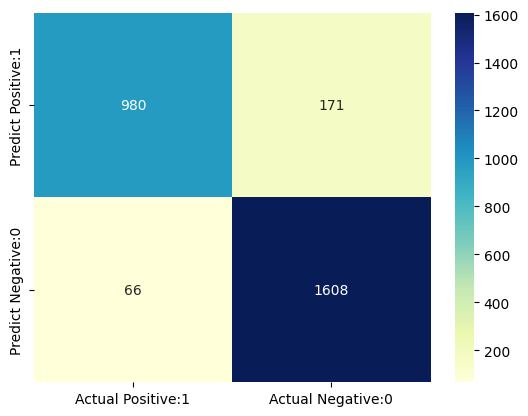

In [27]:
# Visualize the confusion matrix

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


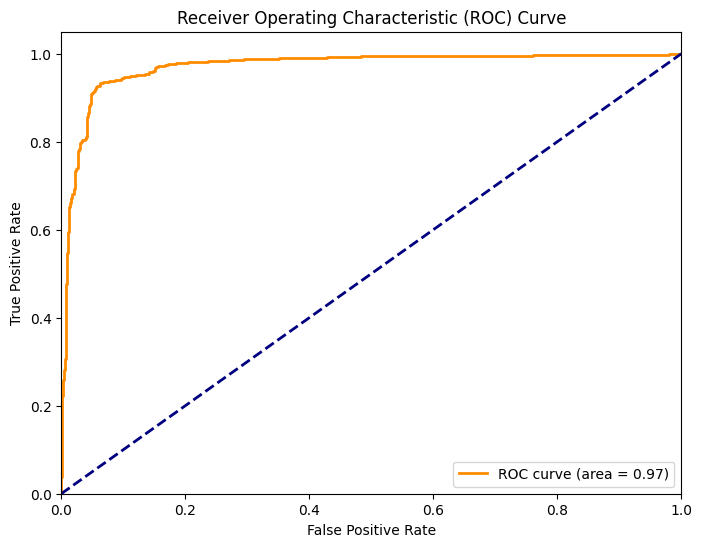

0.9712545425670058

In [28]:
# ROC Curve 


# Predict probabilities for the test set
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Get the probability of the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

roc_auc

In [14]:


# Assuming X_train, X_test, y_train, y_test are already defined from your dataset

# Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.9727433628318584

Decision Tree Confusion Matrix:
 [[1108   43]
 [  34 1640]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1151
           1       0.97      0.98      0.98      1674

    accuracy                           0.97      2825
   macro avg       0.97      0.97      0.97      2825
weighted avg       0.97      0.97      0.97      2825



In [15]:
# Random Forest
# Choosing Random Forest due to slightly better recall
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds)

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)
gb_report = classification_report(y_test, gb_preds)

# Neural Networks
nn = MLPClassifier()
nn.fit(X_train, y_train)
nn_preds = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_preds)
nn_report = classification_report(y_test, nn_preds)

# Print the results for Random Forest, Gradient Boosting, and Neural Networks
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:\n", gb_report)
print("Neural Networks Accuracy:", nn_accuracy)
print("Neural Networks Classification Report:\n", nn_report)


Random Forest Accuracy: 0.9805309734513274
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1151
           1       0.99      0.98      0.98      1674

    accuracy                           0.98      2825
   macro avg       0.98      0.98      0.98      2825
weighted avg       0.98      0.98      0.98      2825

Gradient Boosting Accuracy: 0.968495575221239
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1151
           1       0.97      0.97      0.97      1674

    accuracy                           0.97      2825
   macro avg       0.97      0.97      0.97      2825
weighted avg       0.97      0.97      0.97      2825

Neural Networks Accuracy: 0.8569911504424779
Neural Networks Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75    

In [16]:
# Split the data into training and testing sets



# Model Training
model = RandomForestClassifier()  # Choose the appropriate classifier
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1151
           1       0.98      0.98      0.98      1674

    accuracy                           0.98      2825
   macro avg       0.98      0.98      0.98      2825
weighted avg       0.98      0.98      0.98      2825

Accuracy: 0.9787610619469026


In [37]:
X_train.columns

Index(['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'REV_AT_EPOCH', 'BSTAR',
       'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD',
       'APOAPSIS', 'PERIAPSIS', 'AP_DIFF', 'SEMIMINOR_AXIS',
       'ORBITAL_VELOCITY', 'RCS_SIZE_MEDIUM', 'RCS_SIZE_SMALL'],
      dtype='object')

In [18]:
directory = r"C:\Users\chimi\Desktop\Python Data Science Projects\Space Debris\Task 5- App Deployment\assets"
model_path = fr"{directory}\model.pkl"
joblib.dump(model, model_path)

print("Model saved at:", model_path)

Model saved at: C:\Users\chimi\Desktop\Python Data Science Projects\Space Debris\Task 5- App Deployment\assets\model.pkl
